In [1]:
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
import json
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
consumer_key="Gj2Jom5yJ83X3xKfKowbFyhK2"
consumer_secret="2HctlBNAsMG3mkDHm6tKcC0740jqdwHh9g2IVfrLxXT10ilQZo"
access_token="136011868-rM8MaIryZjsLRL7epoWC1hy7iixG5lej4LN5wICA"
access_token_secret="I9VbyWKe9drnYeOwNTG91aQPe8oJKQxivWwGC28I62OwK"

MAX_TWEETS = 50

# This handles Twitter authentication and the connection to Twitter Streaming API
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = API(auth, wait_on_rate_limit=True)

data = Cursor(api.search, q='oscars').items(MAX_TWEETS)
mozsprint_data = []
# You will use this line in production instead of this
# current_working_dir = os.path.dirname(os.path.realpath(__file__))
current_working_dir = "./"
log_tweets = current_working_dir + 'twittersdata.json'
count=0
with open(log_tweets, 'w') as outfile:
    for tweet in data:
        mozsprint_data.append(json.loads(json.dumps(tweet._json)))
        outfile.write(json.dumps(tweet._json))
        outfile.write("\n")
        count=count+1
print(len(mozsprint_data))

# Create the dataframe we will use
tweets = pd.DataFrame()
# We want to know when a tweet was sent
tweets['created_at'] = list(map(
    lambda tweet: time.strftime('%Y-%m-%d %H:%M', time.strptime(tweet['created_at'], '%a %b %d %H:%M:%S +0000 %Y')),
    mozsprint_data))
# Who is the tweet owner
tweets['user'] = list(map(lambda tweet: tweet['user']['screen_name'], mozsprint_data))
# How many follower this user has+

tweets['user_followers_count'] = list(map(lambda tweet: tweet['user']['followers_count'], mozsprint_data))
tweets['text'] = list(map(lambda tweet: tweet['text'], mozsprint_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], mozsprint_data))
tweets['Location'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, mozsprint_data))
tweets['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], mozsprint_data))
tweets['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], mozsprint_data))
tweets['coordinates'] = list(map(lambda tweet: tweet['coordinates'] if tweet['place'] != None else None, mozsprint_data))
tweets['screen_name'] = list(map(lambda tweet: tweet['user']['screen_name'], mozsprint_data))
tweets['profile_image_url'] = list(map(lambda tweet: tweet['user']['profile_image_url'], mozsprint_data))
tweets['followers_count'] = list(map(lambda tweet: tweet['user']['followers_count'], mozsprint_data))
tweets['source'] = list(map(lambda tweet: tweet['source'], mozsprint_data))
tweets['url'] = list(map(lambda tweet: tweet['user']['url'], mozsprint_data))
tweets['local_lang'] = list(map(lambda tweet: tweet['metadata']['iso_language_code'], mozsprint_data))
#print(tweets['coordinates'])

#print(tweets.head())
#print (tweets.head())
#print(max(tweets['retweet_count']))
#print(np.argsort(tweets['retweet_count'],order='a')[::-1][:5])
# for index in tweets['text']:
##print(index)
def plot_tweets_per_category(category, title, x_title, y_title, top_n=5, output_filename="plot.png"):
    tweets_by_cat = category.value_counts()
    fig, ax = plt.subplots()
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    ax.set_title(title)
    tweets_by_cat[:top_n].plot(ax=ax, kind='line')
    fig.savefig(output_filename)
    fig.show()

created_at = pd.DataFrame(tweets['created_at'].value_counts())
#print(created_at[:5])

plot_tweets_per_category(tweets['created_at'],
                         "",
                         "Timeline",
                         "Number of Tweets",
                         1000,
                         "Timeline.png")


name_profile = pd.DataFrame([tweets['screen_name'],tweets['profile_image_url'],tweets['followers_count']])
#print(name_profile[:5])

total_retweets=pd.DataFrame(tweets['retweet_count'])
total_favourites=pd.DataFrame(tweets['favorite_count'])
t_retweets = total_retweets.sum()
t_favourites = total_favourites.sum()
print((int(t_favourites)+int(t_retweets)))

print(len(tweets['screen_name'].unique()))
max_retweet = pd.DataFrame([tweets['screen_name'],tweets['profile_image_url'],tweets['retweet_count'],tweets['text'],tweets['url']])
#print(max_retweet.describe())
#max_retweet.sort(int(['retweet_count']),ascending=False)
#print(max_retweet[:5])



top_sites = pd.DataFrame(tweets['source'].value_counts())
#print(top_sites[:5])

location = pd.DataFrame(tweets['Location'].value_counts())
#print(location[:5])

language = pd.DataFrame(tweets['lang'].value_counts())
#print(language[:5])

local_lang = pd.DataFrame(tweets['local_lang'].value_counts())
#print(local_lang[:5])

location_coordinates = pd.DataFrame(tweets['Location'],tweets['coordinates'])
#print(location_coordinates[:5])




# df = pd.DataFrame(tweets['created_at'], columns=['number_tweets'])
# # df['date'] = df.index
# print(df.index)
# print(df.head())

NameError: name 'tweepy' is not defined

In [11]:
tweets=tweets.fillna(0)

In [12]:
tweets['created_at'].value_counts()

2017-03-13 01:40    8
2017-03-13 01:36    7
2017-03-13 01:35    7
2017-03-13 01:39    6
2017-03-13 01:41    6
2017-03-13 01:34    4
2017-03-13 01:38    3
2017-03-13 01:33    3
2017-03-13 01:32    3
2017-03-13 01:37    3
Name: created_at, dtype: int64

In [13]:
sort_by_retweet = (tweets.sort_values(['retweet_count'], ascending=[0])).loc[: 10,['text','lang','retweet_count']]
sort_by_retweet

,text,lang,retweet_count
27,RT @KeithUrban: Sharing the love !!!!!!!!! #Os...,en,11579
18,"RT @TheGabbieShow: i wish the oscars had a ""be...",en,2951
45,"RT @DennisVanasse1: ""Deadpools"" @StefanKapicic...",en,2613
32,"RT @DennisVanasse1: ""Deadpools"" @StefanKapicic...",en,2613
1,"RT @DennisVanasse1: ""Deadpools"" @StefanKapicic...",en,2613
24,"RT @DennisVanasse1: ""Deadpools"" @StefanKapicic...",en,2613
40,"RT @DennisVanasse1: ""Deadpools"" @StefanKapicic...",en,2613
17,"RT @DennisVanasse1: ""Deadpools"" @StefanKapicic...",en,2613
14,"RT @DennisVanasse1: ""Deadpools"" @StefanKapicic...",en,2613
44,"RT @DennisVanasse1: ""Deadpools"" @StefanKapicic...",en,2613


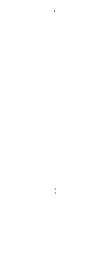

In [14]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = "test".join(str(x) for x in tweets['text'])

no_urls_no_tags = " ".join([word for word in text.split()
                            if 'http' not in word
                            and not word.startswith('@')
                            and word != 'RT'
                            ])
wc = WordCloud(background_color="white", stopwords=STOPWORDS, width=1800,
               height=1400)
wc.generate(no_urls_no_tags)
plt.imshow(wc)
plt.axis("off")
plt.savefig('mozsprint.png')
plt.show()

In [167]:
tweets.loc[tweets['retweet_count']==max(tweets['retweet_count']),['text','lang','retweet_count']]

In [21]:
recent_users = (tweets.sort_values(['created_at'], ascending=[0])).loc[:10,['user','profile_image_url']]
recent_users[0:10]

,user,profile_image_url
0,sinekdoks,http://pbs.twimg.com/profile_images/6361742328...
4,lajuantonsoup,http://pbs.twimg.com/profile_images/3788000001...
5,Septiaan_Re,http://pbs.twimg.com/profile_images/7183845470...
1,HannahDanilelaL,http://pbs.twimg.com/profile_images/7136091694...
3,MadhuSigns,http://pbs.twimg.com/profile_images/8406006771...
2,ShafShahid,http://pbs.twimg.com/profile_images/6953896683...
10,bradhende1rson,http://pbs.twimg.com/profile_images/7124442601...


In [22]:
engagement_users = (tweets.sort_values(['followers_count'], ascending=[0])).loc[:10,['user','profile_image_url']]
engagement_users[:10]

,user,profile_image_url
49,pops131,http://pbs.twimg.com/profile_images/5653333311...
38,Love_bug1016,http://pbs.twimg.com/profile_images/8399837951...
20,A_Trusts,http://pbs.twimg.com/profile_images/2713282910...
19,saminhim,http://pbs.twimg.com/profile_images/1159820179...
46,gra_underglam,http://pbs.twimg.com/profile_images/4406134881...
39,itsaboutlali,http://pbs.twimg.com/profile_images/8089184993...
5,Septiaan_Re,http://pbs.twimg.com/profile_images/7183845470...
22,AuroraNebulosa,http://pbs.twimg.com/profile_images/8290424594...
21,AuthoressRedd,http://pbs.twimg.com/profile_images/8364207098...
7,HollaAtYaBoiLou,http://pbs.twimg.com/profile_images/8052836572...


In [30]:
tweets['user'].value_counts()

Djmonikari28       4
raj11Maheshwari    1
bradhende1rson     1
merytmills         1
Septiaan_Re        1
ShafShahid         1
hSoresChildybg     1
smallbusinesgsg    1
Dieppe76France     1
Love_bug1016       1
MotherHubbsdra     1
pops131            1
lajuantonsoup      1
HannahDanilelaL    1
JTrehar            1
Two_Cams25         1
A_Trusts           1
Endless_LyP        1
GregKlymkiwCFC     1
diceynk            1
PierreWCoelnam     1
gra_underglam      1
HollaAtYaBoiLou    1
itsaboutlali       1
AlRob_MN           1
smithblayen901     1
MadhuSigns         1
sAs422             1
Moniquen9r8        1
UnfitWii           1
weRsuccessors      1
AuroraNebulosa     1
sinekdoks          1
pwilsno98          1
saminhim           1
sebastalama        1
aLuraKuriger       1
AuthoressRedd      1
elogertner         1
gabbiehanna1221    1
bcm112observer     1
therealbevin       1
gioo_mendes        1
Filtered_Trump     1
riaminx            1
__piuwlz           1
pumkinzsarea       1
Name: user, d

In [27]:
tweets['Location'].value_counts()

0            48
Canada        1
Indonesia     1
Name: Location, dtype: int64

In [29]:
tweets['lang'].value_counts()

en    42
es     3
sl     1
et     1
pt     1
th     1
in     1
Name: lang, dtype: int64

In [8]:
import pygal as pg
from IPython.display import SVG

In [9]:
tweets['user_followers_count'].describe()

count        50.000000
mean       9203.020000
std       33534.864826
min           5.000000
25%          79.750000
50%         636.500000
75%        1934.750000
max      169472.000000
Name: user_followers_count, dtype: float64

In [83]:
tweets.loc[tweets['retweet_count']==max(tweets['retweet_count']),['text','lang','retweet_count']]

,text,lang,retweet_count
14,b'RT @telor_goyang: Nabil Ahmad dari mat despa...,in,16107
25,b'RT @telor_goyang: Nabil Ahmad dari mat despa...,in,16107
37,b'RT @telor_goyang: Nabil Ahmad dari mat despa...,in,16107


In [10]:
max(tweets['retweet_count'])

36371

In [7]:
sort_by_retweet = (tweets.sort_values(['retweet_count'], ascending=[0])).loc[:10,['text','lang','retweet_count']]

In [8]:
sort_by_retweet.loc[:10,['text','lang','retweet_count']]

,text,lang,retweet_count
35,RT @joanneprada: me leaving the oscars after s...,en,28945
19,RT @IAmSteveHarvey: Call me Warren Beatty. I c...,en,14493
24,"RT @KyleKriegerHair: For the record, here's so...",en,3251
2,RT @pettyblackgirI: Let us not forget the time...,en,2494
27,RT @pettyblackgirI: Let us not forget the time...,en,2494
7,RT @pettyblackgirI: Let us not forget the time...,en,2494
25,"RT @DennisVanasse1: ""Deadpools"" @StefanKapicic...",en,2370
15,"RT @DennisVanasse1: ""Deadpools"" @StefanKapicic...",en,2370
29,"RT @DennisVanasse1: ""Deadpools"" @StefanKapicic...",en,2370
18,"RT @DennisVanasse1: ""Deadpools"" @StefanKapicic...",en,2370


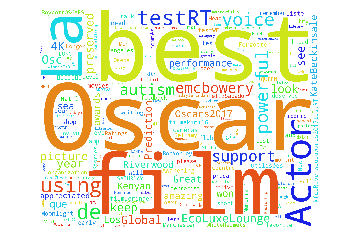

In [15]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = "test".join(str(x) for x in tweets['text'])

no_urls_no_tags = " ".join([word for word in text.split()
                            if 'http' not in word
                            and not word.startswith('@')
                            and word != 'RT'
                            ])
wc = WordCloud(background_color="white", stopwords=STOPWORDS, width=1800,
               height=1400)
wc.generate(no_urls_no_tags)
plt.imshow(wc)
plt.axis("off")
plt.savefig('mozsprint.png')
plt.show()

In [156]:
tweets['text'][9]

b'Por fin tenemos una respuesta a la rara forma de aplaudir de Nicole Kidman en los #Oscars\nhttps://t.co/JePmI312YT'

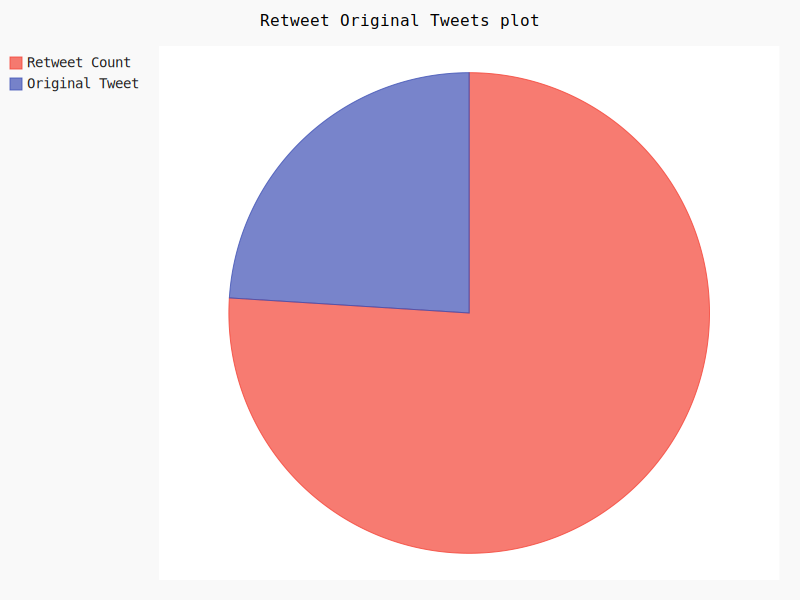

In [13]:
retweet_count=0
original_tweet=0
for text in tweets['text']:
    if text.startswith('RT'):
        retweet_count=retweet_count+1
    else:
        original_tweet = original_tweet+1
pie_chart = pg.Pie()
pie_chart.title = 'Retweet Original Tweets plot'
pie_chart.add('Retweet Count', (retweet_count/(retweet_count+original_tweet)*100))
pie_chart.add('Original Tweet',(original_tweet/(retweet_count+original_tweet)*100))
SVG(pie_chart.render())


In [203]:
tweets['source'][7]

'<a href="https://dlvrit.com/" rel="nofollow">dlvr.it</a>'

In [16]:
import re
index=0
for source in tweets['source']:
    tweets['source'][index] = re.sub('<[^>]*>', '', source)
    index=index+1

C:\Users\dhineshvikram\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [247]:
twitter_source_freq = tweets['source'].value_counts()

In [28]:
tweets['source'].value_counts()

Twitter Web Client     16
Twitter for Android    12
Twitter for iPhone     12
TweetDeck               5
Buffer                  2
Mobile Web (M5)         1
Twitter for iPad        1
blooddonor030           1
Name: source, dtype: int64

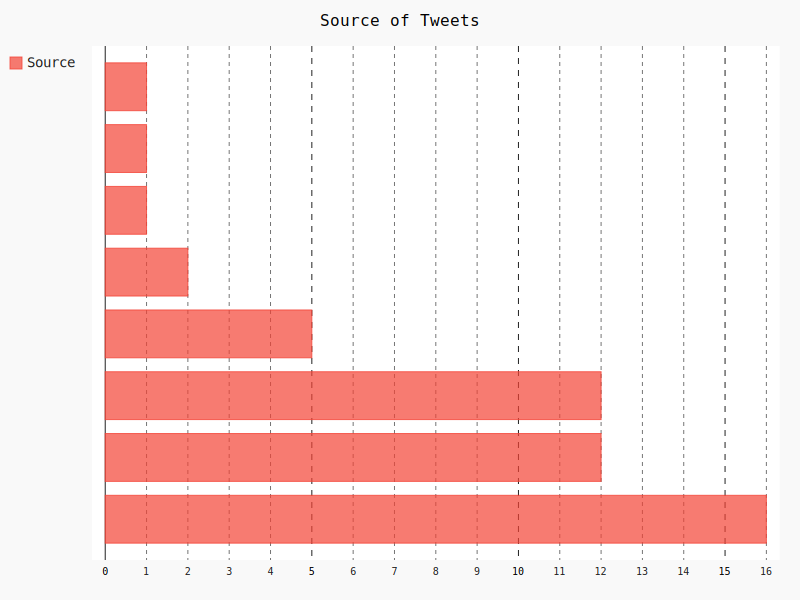

In [18]:
line_chart = pg.HorizontalBar()
line_chart.title = 'Source of Tweets'
line_chart.add('Source',tweets['source'].value_counts())

SVG(line_chart.render())

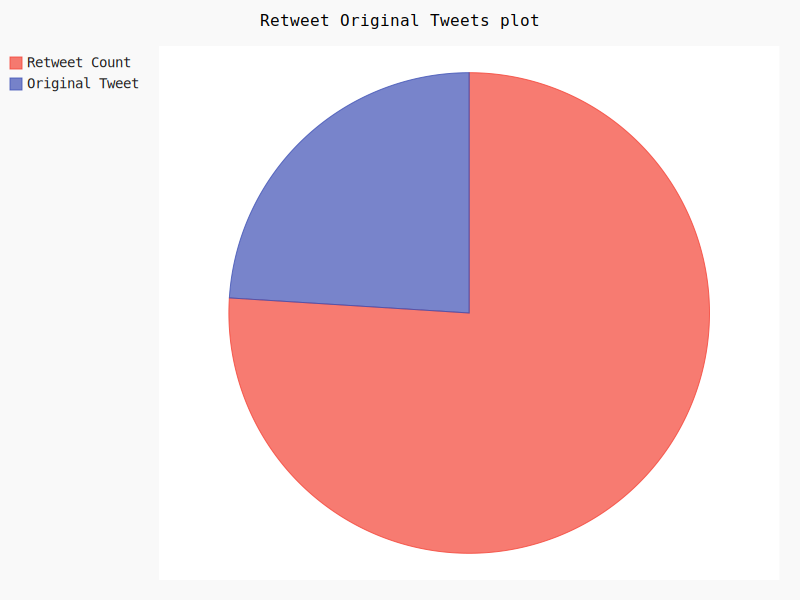

In [19]:
retweet_count=0
original_tweet=0
for text in tweets['text']:
    if text.startswith('RT'):
        retweet_count=retweet_count+1
    else:
        original_tweet = original_tweet+1
pie_chart = pg.Pie()
pie_chart.title = 'Retweet Original Tweets plot'
pie_chart.add('Retweet Count', (retweet_count/(retweet_count+original_tweet)*100))
pie_chart.add('Original Tweet',(original_tweet/(retweet_count+original_tweet)*100))
SVG(pie_chart.render())

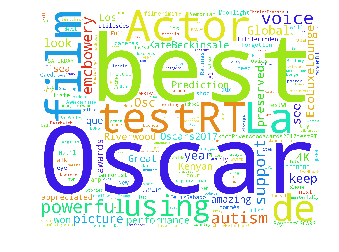

In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = "test".join(str(x) for x in tweets['text'])

no_urls_no_tags = " ".join([word for word in text.split()
                            if 'http' not in word
                            and not word.startswith('@')
                            and word != 'RT'
                            ])
wc = WordCloud(background_color="white", stopwords=STOPWORDS, width=1800,
               height=1400)
wc.generate(no_urls_no_tags)
plt.imshow(wc)
plt.axis("off")
plt.savefig('mozsprint.png')
plt.show()

In [21]:
sort_by_retweet = (tweets.sort_values(['retweet_count'], ascending=[0])).loc[: 10,['text','lang','retweet_count']]

In [23]:
sort_by_retweet.loc[:10]

,text,lang,retweet_count
2,RT @mrylstrp: lets remember this iconic devil ...,en,36371
42,RT @joanneprada: me leaving the oscars after s...,en,28904
9,RT @RightWingAngel: “The Forgotten Men and Wom...,en,14654
25,RT @jimmykimmel: Here’s the INSIDE story of wh...,en,4877
29,"RT @TheGabbieShow: i wish the oscars had a ""be...",en,2855
44,RT @autism_changes: Actor @GillesMarini using ...,en,2118
6,RT @autism_changes: Actor @GillesMarini using ...,en,2118
24,RT @autism_changes: Actor @GillesMarini using ...,en,2118
18,RT @autism_changes: Actor @GillesMarini using ...,en,2118
0,RT @RanaHarbi: 2017: The year Al-Qaeda terrori...,en,1572


In [26]:
impression = tweets['retweet_count'].sum()+tweets['favorite_count'].sum()

In [27]:
impression

99632